In [1]:
#importing relevant libraries
import pandas as pd
from nltk.probability import FreqDist
from nltk import pos_tag
from nltk import RegexpParser
from collections import Counter
import nltk
import textstat
import language_tool_python
from sklearn import preprocessing
import tensorflow as tf
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score


Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
# Function to select best features using sklearn library
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [3]:
# Function to train the ANN on the manually extracted features, using 4 hidden layers with number of neurons 
# halving with each subsequent layer
def train_model_man(X,y):
    ann.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=X[0].shape))
    ann.add(tf.keras.layers.Dense(units=50, activation='relu'))
    ann.add(tf.keras.layers.Dense(units=25, activation='relu'))
    ann.add(tf.keras.layers.Dense(units=12, activation='relu'))
    ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    ann.fit(X, y, batch_size = 32, epochs = 100)

In [4]:
# Function to train the ANN on the features extracted using Universal Sentence Encoder, using 2 hidden layers 
# with number of neurons halving with each subsequent layer
def train_model_auto(X,y):
    ann2.add(tf.keras.layers.Dense(units=8, activation='relu', input_shape=X[0].shape))
    ann2.add(tf.keras.layers.Dense(units=4, activation='relu'))
    ann2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    ann2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    ann2.fit(X, y, batch_size = 32, epochs = 100)

In [25]:
# Function to test the ANN built on the manually extracted set of features  
def test_model_man(fname, X):
    dfn = pd.read_csv(fname)
    y_pred = ann.predict(X) #y_pred predicts class of each question with a certain confidence
    y_bi = y_pred.copy()
    y_bi = (y_bi>0.5) #this helps classify each question as either "good" or "bad"
    y_res = np.array(y_pred)
    ranking = {}
    # for loop is for finding the maximum confidence value in the prediction for class label in y_res
    # and ordering the indices of questions in descending order of confidence
    for j in range(len(y_res)): 
        maxi = 0
        for i in range(len(y_res)):
            if y_res[i]>y_res[maxi]: 
                maxi=i
        y_res[maxi] = 0       
        ranking[j] = maxi
    # finally, we use the indices and map the rankings with the questions themselves and 
    # store them in ques_ranking
    ques_ranking = {}
    for i in range(len(y_pred)):
        ques_ranking[i] = dfn.iloc[ranking[i]]['Question']
    for key in ques_ranking:
        print(str(key)+": "+str(ques_ranking[key]))

In [24]:
# Function to test the ANN built on the set of features extracted using Universal Sentence Encoder
# A similar procedure as above is followed for this function
def test_model_auto(fname, X):
    dfn = pd.read_csv(fname)
    y_pred = ann2.predict(X)
    y_bi = y_pred.copy()
    y_bi = (y_bi>0.5)
    y_res = np.array(y_pred)
    ranking = {}
    for j in range(len(y_res)):
        maxi = 0
        for i in range(len(y_res)):
            if y_res[i]>y_res[maxi]:
                maxi=i
        y_res[maxi] = 0       
        ranking[j] = maxi
    ques_ranking = {}
    for i in range(len(y_pred)):
        ques_ranking[i] = dfn.iloc[ranking[i]]['Question']
    for key in ques_ranking:
        print(str(key)+": "+str(ques_ranking[key]))

In [7]:
# Function to extract features from the questions, and remove redundant and irrelevant features
def train_manual(fname, index):
    df= pd.read_csv(fname)
    
    # Feature 1: Number of tokens in the question
    token = []
    for question in df['Question']:
        fdist = FreqDist(question)
        no_of_tokens = fdist.N()
        token.append(no_of_tokens)
    df['No_of_ques_tokens']=token
    
    # Feature 2: Number of tokens in answer to the question
    token = []
    for answer in df['Answer']:
        fdist = FreqDist(answer)
        no_of_tokens = fdist.N()
        token.append(no_of_tokens)
    df['No_of_ans_tokens']=token
    
    # Feature 3: Binary feature to indicate the presence of 'What' in the question
    wh = []
    sub_str = 'What'
    for question in df['Question']:
        if (question.find(sub_str) == -1):
            wh.append(0)
        else:
            wh.append(1)
    df['What'] = wh
    
    # Feature 4: Binary feature to indicate the presence of 'When' in the question
    wh = []
    sub_str = 'When'
    for question in df['Question']:
        if (question.find(sub_str) == -1):
            wh.append(0)
        else:
            wh.append(1)
    df['When'] = wh
    
    # Feature 5: Binary feature to indicate the presence of 'Why' in the question
    wh = []
    sub_str = 'Why'
    for question in df['Question']:
        if (question.find(sub_str) == -1):
            wh.append(0)
        else:
            wh.append(1)
    df['Why'] = wh
    
    # Feature 6: Binary feature to indicate the presence of 'Which' in the question
    wh = []
    sub_str = 'Which'
    for question in df['Question']:
        if (question.find(sub_str) == -1):
            wh.append(0)
        else:
            wh.append(1)
    df['Which'] = wh
    
    # Feature 7: Binary feature to indicate the presence of 'Whom' in the question
    wh = []
    sub_str = 'Whom'
    for question in df['Question']:
        if (question.find(sub_str) == -1):
            wh.append(0)
        else:
            wh.append(1)
    df['Whom'] = wh
    
    # Feature 8: Binary feature to indicate the presence of 'Where' in the question
    wh = []
    sub_str = 'Where'
    for question in df['Question']:
        if (question.find(sub_str) == -1):
            wh.append(0)
        else:
            wh.append(1)
    df['Where'] = wh
    
    # Feature 9: Binary feature to indicate the presence of 'Whose' in the question
    wh = []
    sub_str = 'Whose'
    for question in df['Question']:
        if (question.find(sub_str) == -1):
            wh.append(0)
        else:
            wh.append(1)
    df['Whose'] = wh
    
    # Feature 10: Binary feature to indicate the presence of 'Who' in the question
    wh = []
    sub_str = 'Who'
    for question in df['Question']:
        if (question.find(sub_str) == -1):
            wh.append(0)
        else:
            wh.append(1)
    df['Who'] = wh
    
    # Feature 11: Binary feature to indicate the presence of 'How' in the question
    wh = []
    sub_str = 'How'
    for question in df['Question']:
        if (question.find(sub_str) == -1):
            wh.append(0)
        else:
            wh.append(1)
    df['How'] = wh
    
    # Feature 12: Binary feature to indicate the presence of negation in the question
    neg = []
    sub_str_1 = 'not'
    sub_str_2 = 'never'
    sub_str_3 = 'no'
    for question in df['Question']:
        if (question.find(sub_str_1) == -1 or question.find(sub_str_2)==-1 or question.find(sub_str_3==-1)):
            neg.append(0)
        else:
            neg.append(1)
    df['Negation'] = neg
    
    # Features 13-22: Counting the number of nouns, adjectives, prepositions, etc. to understand the strcutre 
    # of the sentence using POS tagging
    nouns = []
    proper_nouns = []
    pronouns = []
    conjunctions = []
    adverbs = []
    pasts = []
    presents = []
    prepositions = []
    adjectives = []
    numbers = []
    for question in df['Question']:
        lower_case = question.lower()
        tokens = nltk.word_tokenize(lower_case)    
        tags = pos_tag(tokens)
        count = Counter( tag for word,  tag in tags)
        proper_noun = count['NNP']+count['NNPS']
        noun = count['NN']+count['NNS']
        adjective = count['JJ']+count['JJR']+count['JJS']
        pronoun = count['PRP'] +count['PRP$']
        adverb = count['RB']+count['RBR']+count['RBS']
        conjunction = count['CC']
        number = count['CD']
        preposition = count['IN']
        past_tense = count['VBD']+count['VBN']
        present_tense = count['VBP']+count['VBZ']
        if past_tense>0:
            past = 1
        else:
            past = 0
        if present_tense>0:
            present = 1
        else:
            present = 0
        nouns.append(noun)
        proper_nouns.append(proper_noun)
        pronouns.append(pronoun)
        conjunctions.append(conjunction)
        adverbs.append(adverb)
        pasts.append(past)
        presents.append(present)
        prepositions.append(preposition)
        adjectives.append(adjective)
        numbers.append(number)
    df['noun'] = nouns
    df['adjective'] = adjectives
    df['proper_noun'] = proper_nouns
    df['pronoun'] = pronouns
    df['adverb'] = adverbs
    df['conjuction'] = conjunctions
    df['number'] = numbers
    df['prepostion'] = prepositions
    df['past_tense'] =pasts
    df['present_tense']=presents
    
    # Feature 23: Flesch score to evaluate the reading difficulty
    flesch = []
    for question in df['Question']:
        score = textstat.flesch_reading_ease(question)
        flesch.append(score)
    df['Reading_ease'] = flesch
    
    #Feature 24: Number of grammatical mistakes
    tool = language_tool_python.LanguageTool('en-US')
    mistakes = []
    for question in df['Question']:
        matches = tool.check(question)    
        mistakes.append(len(matches))
    df['No_of_grammar_errors'] = mistakes
    
    # index used to indicate if data that is being processed is training(index == 0), or test(index == 1)
    if index !=1:
        X = df.iloc[:, 3:]
        X['target'] = df['Quality']
        x = X.values #returns a numpy array
        # Normalizing the dataset
        min_max_scaler = preprocessing.MinMaxScaler()
        x_scaled = min_max_scaler.fit_transform(x)
        normalized_df= pd.DataFrame(x_scaled)
        normalized_df.to_csv('test0_done.csv')
    
        filename = 'test0_done.csv'
        data = pd.read_csv(filename, header=None)
        # retrieve numpy array
        dataset = data.values
        X = dataset[1:, 1:-1]
        y = dataset[1:,-1]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
        
        #selecting best features and finding importance of each feature
        X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
        # plot the scores for each feature using bar plot
        pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
        pyplot.show()
        df3 = pd.DataFrame(X)
        cols = []
        for i in range(df3.shape[1]):
            cols.append(i)
        df3.columns = cols
        df3['target']=y
        fs_scores = np.nan_to_num(fs.scores_)
        # Setting the significance threshold as 0.05, and if score is below that, null hypothesis is
        # accepted(which states that the feature has no significant impact on the performance), else
        # the alternate hypothesis is accepted(which states that the feature does have a significant 
        # impact on the performance)
        for i in range(len(fs_scores)):
            if fs_scores[i]<0.05:
                df3.drop(i, axis=1,inplace=True)
            else:
                sel_feat_man.append(i)
        df3.to_csv('sel_feat_test0_done.csv')
        df4 = pd.read_csv('sel_feat_test0_done.csv')
        X = df4.iloc[1:, 1:-1].values
        y = df4.iloc[1:,-1].values
        # after feature selection, data is sent to train the ANN model
        train_model_man(X, y)
        
    else:
        # similar process as above is followed, except the features to be selected are already 
        # pre-decided, and stored in sel_feat_man
        X = df.iloc[:, 2:]
        x = X.values #returns a numpy array
        min_max_scaler = preprocessing.MinMaxScaler()
        x_scaled = min_max_scaler.fit_transform(x)
        df6= pd.DataFrame(x_scaled)
        cols = []
        for i in range(df6.shape[1]):
            cols.append(i)
        df6.columns = cols
        for i in range(df6.shape[1]):
            if i not in sel_feat_man:
                df6.drop(i, axis=1,inplace=True)
        df6.to_csv('test_feat.csv')
        df4 = pd.read_csv('test_feat.csv')
        X = df4.iloc[1:, 1:].values
        test_model_man(fname, X)
        
    

In [8]:
def train_auto(fname, index):
    
    df= pd.read_csv(fname)
    # Extracting features from questions only, using Universal Sentence Encoder
    embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
    embeddings = embed(df['Question'])
    embeddings.shape[1]
    
    cols = []
    for i in range(embeddings.shape[1]):
        cols.append(i)
    df2 = pd.DataFrame(embeddings, columns = cols)
    # converting tensors to float values
    for i in range(embeddings.shape[0]):
        for j in range(embeddings.shape[1]):
            df2.iloc[i][j]=float(df2.iloc[i][j])
            
    # similar procedure as for manual features is followed here for sentence embedding, and feature selection
    X = df2
    if index != 1:
        df2['target'] = df['Quality']
        df2.to_csv('test0_done1.csv')
        filename = 'test0_done1.csv'
        data = pd.read_csv(filename, header=None)
        # retrieve numpy array
        dataset = data.values
        X = dataset[1:, 1:-1]
        y = dataset[1:,-1]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
        X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
        # plot the scores
        pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
        pyplot.show()
        df3 = pd.DataFrame(X)
        cols = []
        for i in range(df3.shape[1]):
            cols.append(i)
        df3.columns = cols
        df3['target']=y
        import numpy as np
        fs_scores = np.nan_to_num(fs.scores_)
        for i in range(len(fs_scores)):
            if fs_scores[i]<0.05:
                df3.drop(i, axis=1,inplace=True)
            else:
                sel_feat_auto.append(i)
        df3.to_csv('sel_feat_test.csv')
        df4 = pd.read_csv('sel_feat_test.csv')
        X = df4.iloc[1:, 1:-1].values
        y = df4.iloc[1:,-1].values
        # processed data sent to train ANN models
        train_model_auto(X,y)
    else:
        x = X.values #returns a numpy array
        min_max_scaler = preprocessing.MinMaxScaler()
        x_scaled = min_max_scaler.fit_transform(x)
        normalized_df= pd.DataFrame(x_scaled)
        for i in range(normalized_df.shape[1]):
            if i not in sel_feat_auto:
                normalized_df.drop(i, axis=1,inplace=True)
        normalized_df.to_csv('test_feat1.csv')
        df4 = pd.read_csv('test_feat1.csv')
        X = df4.iloc[1:, 1:].values
        test_model_auto(fname, X)
        
        

In [9]:
def test_manual(fname):
    train_manual(fname, 1)

In [10]:
def test_auto(fname):
    train_auto(fname, 1)

In [26]:
# fname1 is training dataset containing questions, answers, and the labels
# fname is the test dataset containing only the questions, and answers
fname1 = 'Quest_Training.csv'
fname = 'Quest_Test.csv'
sel_feat_man = []
sel_feat_auto = []
ann = tf.keras.models.Sequential()

/Users/sanid/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 4  6  8 11] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/sanid/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


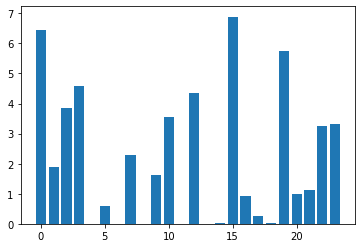

Epoch 1/100
6/7 [========================>.....] - ETA: 0s - loss: 0.6899 - accuracy: 0.5365

2022-05-11 06:54:15.435025: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 17ms/step - loss: 0.6892 - accuracy: 0.5404
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 0.6750 - accuracy: 0.5808
Epoch 3/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6670 - accuracy: 0.5960
Epoch 4/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6597 - accuracy: 0.6111
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6526 - accuracy: 0.6111
Epoch 6/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6454 - accuracy: 0.6616
Epoch 7/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6407 - accuracy: 0.6667
Epoch 8/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6327 - accuracy: 0.6616
Epoch 9/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6259 - accuracy: 0.6667
Epoch 10/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6181 - accuracy: 0.6869
Epoch 11/100
7/7 [======================

7/7 [==============================] - 0s 5ms/step - loss: 0.2445 - accuracy: 0.8838
Epoch 85/100
7/7 [==============================] - 0s 6ms/step - loss: 0.2327 - accuracy: 0.8990
Epoch 86/100
7/7 [==============================] - 0s 5ms/step - loss: 0.2393 - accuracy: 0.8889
Epoch 87/100
7/7 [==============================] - 0s 5ms/step - loss: 0.2307 - accuracy: 0.8990
Epoch 88/100
7/7 [==============================] - 0s 5ms/step - loss: 0.2235 - accuracy: 0.9141
Epoch 89/100
7/7 [==============================] - 0s 5ms/step - loss: 0.2169 - accuracy: 0.9293
Epoch 90/100
7/7 [==============================] - 0s 5ms/step - loss: 0.2186 - accuracy: 0.9141
Epoch 91/100
7/7 [==============================] - 0s 5ms/step - loss: 0.2130 - accuracy: 0.9040
Epoch 92/100
7/7 [==============================] - 0s 7ms/step - loss: 0.2220 - accuracy: 0.8838
Epoch 93/100
7/7 [==============================] - 0s 6ms/step - loss: 0.2147 - accuracy: 0.9091
Epoch 94/100
7/7 [===============

In [27]:
train_manual(fname1, 0)

In [28]:
test_manual(fname)

2022-05-11 06:54:39.364686: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
5 out of the last 5 calls to <function Model.make_predict_function.<locals>.predict_function at 0x2d4239040> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


0: What was the name of the short code that Odeo initially considered as a short code?
1: Who developed the first Twitter prototype?
2: How many conferencegoers kept tabs on each other via constant twitters?
3: What was the definition of the word twitter?
4: Who said that Twitter was absolutely ruling SXSWi?
5: How many tweets were posted per quarter in 2008?
6: What did Twitter describe as in the beginning?
7: What did Williams call Twitter a social network?
8: How did Twitter change from what we thought it was a social network?
9: Who remarked on Newsweek?
10: What was Twitter more than a social network?
11: How many Williams fired Glass?
12: How many tweets did Twitter use per day during the 2007 South by Southwest Interactive SXSWi conference?
13: How many people responded to the SXSWi conference?
14: What was the name of the company that created the first Twitter prototype?
15: How many Twitter staff received the Web Award?
16: What company did Biz Stone, Evan Williams, and Dorsey

2022-05-11 07:00:38.540445: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-05-11 07:00:40.143635: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


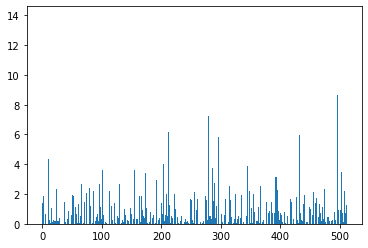

Epoch 1/100
1/7 [===>..........................] - ETA: 1s - loss: 0.6881 - accuracy: 0.6562

2022-05-11 07:01:23.482023: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 11ms/step - loss: 0.6919 - accuracy: 0.5808
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6862 - accuracy: 0.5859
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6821 - accuracy: 0.5859
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6778 - accuracy: 0.5859
Epoch 5/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6735 - accuracy: 0.5859
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6680 - accuracy: 0.5859
Epoch 7/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6615 - accuracy: 0.5859
Epoch 8/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6557 - accuracy: 0.5859
Epoch 9/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6489 - accuracy: 0.5859
Epoch 10/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6426 - accuracy: 0.5859
Epoch 11/100
7/7 [======================

7/7 [==============================] - 0s 5ms/step - loss: 0.2888 - accuracy: 0.9646
Epoch 85/100
7/7 [==============================] - 0s 5ms/step - loss: 0.2868 - accuracy: 0.9697
Epoch 86/100
7/7 [==============================] - 0s 5ms/step - loss: 0.2834 - accuracy: 0.9646
Epoch 87/100
7/7 [==============================] - 0s 5ms/step - loss: 0.2805 - accuracy: 0.9646
Epoch 88/100
7/7 [==============================] - 0s 5ms/step - loss: 0.2767 - accuracy: 0.9747
Epoch 89/100
7/7 [==============================] - 0s 5ms/step - loss: 0.2739 - accuracy: 0.9747
Epoch 90/100
7/7 [==============================] - 0s 5ms/step - loss: 0.2716 - accuracy: 0.9747
Epoch 91/100
7/7 [==============================] - 0s 5ms/step - loss: 0.2683 - accuracy: 0.9747
Epoch 92/100
7/7 [==============================] - 0s 5ms/step - loss: 0.2656 - accuracy: 0.9747
Epoch 93/100
7/7 [==============================] - 0s 5ms/step - loss: 0.2626 - accuracy: 0.9798
Epoch 94/100
7/7 [===============

2022-05-11 07:01:27.585446: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [29]:
ann2 = tf.keras.models.Sequential()
train_auto(fname1, 0)

In [30]:
test_auto(fname)

2022-05-11 07:02:20.310247: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-05-11 07:02:21.970608: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-05-11 07:02:29.449627: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
6 out of the last 6 calls to <function Model.make_predict_function.<locals>.predict_function at 0x33a02fee0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary

0: What was the name of the company that created the first Twitter prototype?
1: Who introduced the idea of an individual using an SMS service to communicate with a small group?
2: What was the name of the disemvowelled version of the word twitter?
3: What was Odeo's name changed to?
4: What was the name of the short code that Odeo initially considered as a short code?
5: When did the project begin?
6: How many words did Dorsey explain the origin of the Twitter title?
7: What was the definition of the word twitter?
8: Who developed the first Twitter prototype?
9: When did 31 Twitter spin off into its own company?
10: How many interviews did Williams provide insight into the ambiguity that defined this early period in 2013?
11: What did Williams call Twitter a social network?
12: How did Twitter change from what we thought it was a social network?
13: What did Twitter describe as in the beginning?
14: How many tweets did Twitter use per day during the 2007 South by Southwest Interactive